In [1]:
pip install xgboost


  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [4]:
df_train = pd.read_csv(r"E:\child-mind-institute-problematic-internet-use\train.csv")
df_test = pd.read_csv(r"E:\child-mind-institute-problematic-internet-use\test.csv")

In [6]:
df_train.shape

(3960, 82)

In [7]:
df_test.shape

(20, 59)

In [8]:
df_train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_test.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print("Columns in Train Set: ", df_train.columns)
print("Columns in Test Set: ", df_test.columns)

Columns in Train Set:  Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-

PCIAT features should not be used for modeling since SII is derived from PCIAT, which means including them will lead to data leakage.

# Data Cleaning

In [20]:
columns_to_keep = [col for col in df_train.columns if col in df_test.columns or col == 'sii']

df_train = df_train[columns_to_keep]

print("Updated Columns in Train Set: ", df_train.columns)
print("Columns in Test Set: ", df_test.columns)

Updated Columns in Train Set:  Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW

In [22]:
for col, dtype in df_train.dtypes.items():
    print(f"Column '{col}' has data type: {dtype}")

Column 'id' has data type: object
Column 'Basic_Demos-Enroll_Season' has data type: object
Column 'Basic_Demos-Age' has data type: int64
Column 'Basic_Demos-Sex' has data type: int64
Column 'CGAS-Season' has data type: object
Column 'CGAS-CGAS_Score' has data type: float64
Column 'Physical-Season' has data type: object
Column 'Physical-BMI' has data type: float64
Column 'Physical-Height' has data type: float64
Column 'Physical-Weight' has data type: float64
Column 'Physical-Waist_Circumference' has data type: float64
Column 'Physical-Diastolic_BP' has data type: float64
Column 'Physical-HeartRate' has data type: float64
Column 'Physical-Systolic_BP' has data type: float64
Column 'Fitness_Endurance-Season' has data type: object
Column 'Fitness_Endurance-Max_Stage' has data type: float64
Column 'Fitness_Endurance-Time_Mins' has data type: float64
Column 'Fitness_Endurance-Time_Sec' has data type: float64
Column 'FGC-Season' has data type: object
Column 'FGC-FGC_CU' has data type: float64

In [23]:
df_train['Basic_Demos-Sex'] = df_train['Basic_Demos-Sex'].replace({0: 'Male', 1: 'Female'})
df_train['FGC-FGC_CU_Zone'] = df_train['FGC-FGC_CU_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_GSND_Zone'] = df_train['FGC-FGC_GSND_Zone'].replace({1: 'Weak', 2: 'Normal', 3: 'Strong'})
df_train['FGC-FGC_GSD_Zone'] = df_train['FGC-FGC_GSD_Zone'].replace({1: 'Weak', 2: 'Normal', 3: 'Strong'})
df_train['FGC-FGC_PU_Zone'] = df_train['FGC-FGC_PU_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_SRL_Zone'] = df_train['FGC-FGC_SRL_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_SRR_Zone'] = df_train['FGC-FGC_SRR_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['FGC-FGC_TL_Zone'] = df_train['FGC-FGC_TL_Zone'].replace({0: 'Needs Improvement', 1: 'Healthy Fitness Zone'})
df_train['BIA-BIA_Activity_Level_num'] = df_train['BIA-BIA_Activity_Level_num'].replace({1: 'Very Light', 2: 'Light', 3: 'Moderate', 4: 'Heavy', 5: 'Exceptional'})
df_train['BIA-BIA_Frame_num'] = df_train['BIA-BIA_Frame_num'].replace({1: 'Small', 2: 'Medium', 3: 'Large'})
# df_train['PCIAT-PCIAT_01'] = df_train['PCIAT-PCIAT_01'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_02'] = df_train['PCIAT-PCIAT_02'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_03'] = df_train['PCIAT-PCIAT_03'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_04'] = df_train['PCIAT-PCIAT_04'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_05'] = df_train['PCIAT-PCIAT_05'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_06'] = df_train['PCIAT-PCIAT_06'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_07'] = df_train['PCIAT-PCIAT_07'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_08'] = df_train['PCIAT-PCIAT_08'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_09'] = df_train['PCIAT-PCIAT_09'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_10'] = df_train['PCIAT-PCIAT_10'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_11'] = df_train['PCIAT-PCIAT_11'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_12'] = df_train['PCIAT-PCIAT_12'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_13'] = df_train['PCIAT-PCIAT_13'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_14'] = df_train['PCIAT-PCIAT_14'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_15'] = df_train['PCIAT-PCIAT_15'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_16'] = df_train['PCIAT-PCIAT_16'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_17'] = df_train['PCIAT-PCIAT_17'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_18'] = df_train['PCIAT-PCIAT_18'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_19'] = df_train['PCIAT-PCIAT_19'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
# df_train['PCIAT-PCIAT_20'] = df_train['PCIAT-PCIAT_20'].replace({0: 'Does Not Apply', 1: 'Rarely', 2: 'Occasionally', 3: 'Frequently', 4: 'Often', 5: 'Always'})
df_train['PreInt_EduHx-computerinternet_hoursday'] = df_train['PreInt_EduHx-computerinternet_hoursday'].replace({0: 'Less than 1h/day', 1: 'Around 1h/day', 2: 'Around 2hs/day', 3: 'More than 3hs/day'})
df_train['sii'] = df_train['sii'].replace({0: 'Not Addicted', 1: 'Mildly Addicted', 2: 'Moderately Addicted', 3: 'Severely Addicted'})

In [26]:
print("Total number of inf values:\n",df_train.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum()))

Total number of inf values:
 Basic_Demos-Age                 0
CGAS-CGAS_Score                 0
Physical-BMI                    0
Physical-Height                 0
Physical-Weight                 0
Physical-Waist_Circumference    0
Physical-Diastolic_BP           0
Physical-HeartRate              0
Physical-Systolic_BP            0
Fitness_Endurance-Max_Stage     0
Fitness_Endurance-Time_Mins     0
Fitness_Endurance-Time_Sec      0
FGC-FGC_CU                      0
FGC-FGC_GSND                    0
FGC-FGC_GSD                     0
FGC-FGC_PU                      0
FGC-FGC_SRL                     0
FGC-FGC_SRR                     0
FGC-FGC_TL                      0
BIA-BIA_BMC                     0
BIA-BIA_BMI                     0
BIA-BIA_BMR                     0
BIA-BIA_DEE                     0
BIA-BIA_ECW                     0
BIA-BIA_FFM                     0
BIA-BIA_FFMI                    0
BIA-BIA_FMI                     0
BIA-BIA_Fat                     0
BIA-BIA_ICW        

In [28]:
print("Total number of NaN values: ", df_train.isna().sum())

Total number of NaN values:  id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                

In [30]:
df_train_labelled = df_train[df_train['sii'].notna()]
df_train_labelled.shape

(2736, 60)

In [32]:
df_train_unlabelled = df_train[df_train['sii'].isna()]
df_train_unlabelled.shape

(1224, 60)

In [34]:
nan_percentage = (df_train_labelled.isna().sum()/len(df_train_labelled))*100
print("Percentage of NaN values in each column:\n", nan_percentage)

Percentage of NaN values in each column:
 id                                         0.000000
Basic_Demos-Enroll_Season                  0.000000
Basic_Demos-Age                            0.000000
Basic_Demos-Sex                            0.000000
CGAS-Season                               14.400585
CGAS-CGAS_Score                           14.400585
Physical-Season                            5.153509
Physical-BMI                               7.638889
Physical-Height                            7.529240
Physical-Weight                            5.994152
Physical-Waist_Circumference              82.346491
Physical-Diastolic_BP                      9.429825
Physical-HeartRate                         9.137427
Physical-Systolic_BP                       9.429825
Fitness_Endurance-Season                  53.947368
Fitness_Endurance-Max_Stage               73.282164
Fitness_Endurance-Time_Mins               73.391813
Fitness_Endurance-Time_Sec                73.391813
FGC-Season            

In [36]:
df_train_labelled = df_train_labelled.loc[:, nan_percentage <= 80]

In [38]:
df_train_labelled.shape

(2736, 57)

In [40]:
y = df_train_labelled[['sii']]
X = df_train_labelled.drop(columns=['sii'])

In [42]:
X.shape

(2736, 56)

In [44]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import LabelEncoder

# knn_imputer = KNNImputer(n_neighbors=5)
# label_encoder = LabelEncoder()

# def impute_data(df):
#     for column in df.columns:
#         if pd.api.types.is_numeric_dtype(df[column]):
#             # Apply KNN imputation for numeric columns
#             df[column] = knn_imputer.fit_transform(df[[column]])
#         else:
#             # Apply mode imputation for categorical columns
#             mode_value = df[column].mode()[0]
#             df[column].fillna(mode_value, inplace=True)
#     return df

# X_train = impute_data(X)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

def impute_data(df):
    # Create a copy to avoid modifying original
    df_imputed = df.copy()
    
    # Store original index
    original_index = df_imputed.index
    
    # Initialize imputers
    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Separate numeric and categorical columns
    numeric_columns = df_imputed.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df_imputed.select_dtypes(exclude=['int64', 'float64']).columns
    
    # Handle numeric columns
    if len(numeric_columns) > 0:
        df_imputed[numeric_columns] = knn_imputer.fit_transform(df_imputed[numeric_columns])
    
    # Handle categorical columns
    for column in categorical_columns:
        mode_value = df_imputed[column].mode()[0]
        df_imputed[column].fillna(mode_value, inplace=True)
    
    # Ensure we maintain the original index
    df_imputed.index = original_index
    
    # Verify shape
    print(f"Original shape: {df.shape}")
    print(f"Imputed shape: {df_imputed.shape}")
    
    return df_imputed

# Apply imputation
X_train = impute_data(X)

Original shape: (2736, 56)
Imputed shape: (2736, 56)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1052\3154441531.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(mode_value, inplace=True)


In [45]:
X_train.shape

(2736, 56)

In [46]:
nan_percentage = (X_train.isna().sum()/len(X_train))*100
nan_percentage

id                                        0.0
Basic_Demos-Enroll_Season                 0.0
Basic_Demos-Age                           0.0
Basic_Demos-Sex                           0.0
CGAS-Season                               0.0
CGAS-CGAS_Score                           0.0
Physical-Season                           0.0
Physical-BMI                              0.0
Physical-Height                           0.0
Physical-Weight                           0.0
Physical-Diastolic_BP                     0.0
Physical-HeartRate                        0.0
Physical-Systolic_BP                      0.0
Fitness_Endurance-Season                  0.0
Fitness_Endurance-Max_Stage               0.0
Fitness_Endurance-Time_Mins               0.0
Fitness_Endurance-Time_Sec                0.0
FGC-Season                                0.0
FGC-FGC_CU                                0.0
FGC-FGC_CU_Zone                           0.0
FGC-FGC_GSND                              0.0
FGC-FGC_GSND_Zone                 

In [47]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != 'id']
print(categorical_columns)

['Basic_Demos-Enroll_Season', 'Basic_Demos-Sex', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_Frame_num', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']


In [48]:
X_train.shape

(2736, 56)

In [54]:
ordinal_columns = ['FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_Frame_num', 'PreInt_EduHx-computerinternet_hoursday']
onehot_columns = [col for col in categorical_columns if col not in ordinal_columns]

In [56]:
X_train.shape

(2736, 56)

In [58]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train[ordinal_columns] = ordinal_encoder.fit_transform(X_train[ordinal_columns])

In [60]:
X_train.shape

(2736, 56)

In [62]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()
# encoded_columns = encoder.fit_transform(X_train[onehot_columns])
# encoded_columns_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(onehot_columns))

# X_train = X_train.drop(columns=onehot_columns)
# X_train = pd.concat([X_train, encoded_columns_df], axis=1)
from sklearn.preprocessing import OneHotEncoder

original_index = X_train.index

# Fit and transform OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
encoded_columns = encoder.fit_transform(X_train[onehot_columns])

# Create DataFrame with encoded columns and original index
encoded_columns_df = pd.DataFrame(
    encoded_columns, 
    columns=encoder.get_feature_names_out(onehot_columns),
    index=original_index  # Important: Use original index
)

# Drop original columns and concatenate
X_train = X_train.drop(columns=onehot_columns)
X_train = pd.concat([X_train, encoded_columns_df], axis=1)

# Verify shapes
print("Original index length:", len(original_index))
print("Final X_train shape:", X_train.shape)

Original index length: 2736
Final X_train shape: (2736, 84)


In [64]:
X_train.shape

(2736, 84)

In [66]:
X_train.head()

,id,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,00008ff9,5.0,51.0,16.877316,46.0,50.8,64.8,79.8,110.2,3.4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,000fd460,9.0,60.4,14.035590,48.0,46.0,75.0,70.0,122.0,5.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,00105258,10.0,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,00115b9f,9.0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,6.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,001f3379,13.0,50.0,22.279952,59.5,112.2,60.0,73.0,102.0,4.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Next Steps:
   1) Correlation
   2) Feature Importance
   3) Do encoding on test dataset

In [69]:
X_train = X_train.drop('id',axis=1)

X_train.describe()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,...,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,10.238670,65.360965,18.824580,55.928687,87.855404,69.822515,81.853289,117.086550,4.914401,7.184430,...,0.125000,0.140716,0.221126,0.329313,0.219664,0.229898,0.250000,0.272295,0.238304,0.239401
std,3.427982,11.113597,5.347943,7.319350,42.975969,13.229259,13.299861,16.578575,1.260485,2.083291,...,0.330779,0.347792,0.415081,0.470050,0.414095,0.420844,0.433092,0.445222,0.426124,0.426796
min,5.000000,25.000000,0.000000,36.000000,0.000000,11.000000,27.000000,49.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,60.000000,15.776735,50.250000,57.400000,62.000000,73.000000,107.000000,4.400000,6.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,65.000000,17.826527,55.000000,76.000000,68.000000,81.000000,114.100000,5.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,72.400000,21.084511,61.500000,111.200000,75.050000,90.000000,124.400000,5.400000,8.200000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000
max,22.000000,95.000000,46.102914,78.500000,315.000000,179.000000,138.000000,203.000000,28.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
y.describe()

,sii
count,2736
unique,4
top,Not Addicted
freq,1594


In [73]:
type(y)

pandas.core.frame.DataFrame

In [75]:
# # Ordinal Encoding for y
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder(categories=[['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted']])
# y_encoded = encoder.fit_transform(y[['sii']])
# y = pd.DataFrame(y_encoded, columns=['sii_encoded'])

# y.head()

In [77]:
# # One Hot Encoding for y
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse_output=False)
# y_encoded = encoder.fit_transform(y[['sii']])
# y = pd.DataFrame(y_encoded, columns=encoder.categories_[0])

# y.head()

# Feature Transformation - Standardization

In [80]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit_transform(X_train)

X_train.describe()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,...,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,10.238670,65.360965,18.824580,55.928687,87.855404,69.822515,81.853289,117.086550,4.914401,7.184430,...,0.125000,0.140716,0.221126,0.329313,0.219664,0.229898,0.250000,0.272295,0.238304,0.239401
std,3.427982,11.113597,5.347943,7.319350,42.975969,13.229259,13.299861,16.578575,1.260485,2.083291,...,0.330779,0.347792,0.415081,0.470050,0.414095,0.420844,0.433092,0.445222,0.426124,0.426796
min,5.000000,25.000000,0.000000,36.000000,0.000000,11.000000,27.000000,49.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,60.000000,15.776735,50.250000,57.400000,62.000000,73.000000,107.000000,4.400000,6.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,65.000000,17.826527,55.000000,76.000000,68.000000,81.000000,114.100000,5.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,72.400000,21.084511,61.500000,111.200000,75.050000,90.000000,124.400000,5.400000,8.200000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000
max,22.000000,95.000000,46.102914,78.500000,315.000000,179.000000,138.000000,203.000000,28.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Transformation - Normalization

In [83]:
# from sklearn.preprocessing import MinMaxScaler

# minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
# minmax_scaler.fit_transform(X_train)

# X_train.describe()

# Correlation

In [86]:
X_train.columns

Index(['Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num',
       'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
       'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
       'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday',
       'Basic_Demos-Enroll_Season_Fall', 

In [88]:
X_train.shape

(2736, 83)

Classes: ['Mildly Addicted' 'Moderately Addicted' 'Not Addicted'
 'Severely Addicted']
Encoded values: [0 1 2 3]
[0]	validation_0-merror:0.45803	validation_0-mlogloss:1.32630
[1]	validation_0-merror:0.44526	validation_0-mlogloss:1.27721
[2]	validation_0-merror:0.45985	validation_0-mlogloss:1.23740
[3]	validation_0-merror:0.43796	validation_0-mlogloss:1.20248
[4]	validation_0-merror:0.43796	validation_0-mlogloss:1.17267
[5]	validation_0-merror:0.44343	validation_0-mlogloss:1.14714
[6]	validation_0-merror:0.44891	validation_0-mlogloss:1.12468
[7]	validation_0-merror:0.44891	validation_0-mlogloss:1.10385
[8]	validation_0-merror:0.43978	validation_0-mlogloss:1.08619
[9]	validation_0-merror:0.44161	validation_0-mlogloss:1.07025
[10]	validation_0-merror:0.43431	validation_0-mlogloss:1.05783
[11]	validation_0-merror:0.43796	validation_0-mlogloss:1.04574
[12]	validation_0-merror:0.43431	validation_0-mlogloss:1.03319
[13]	validation_0-merror:0.43431	validation_0-mlogloss:1.02297
[14]	validation

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


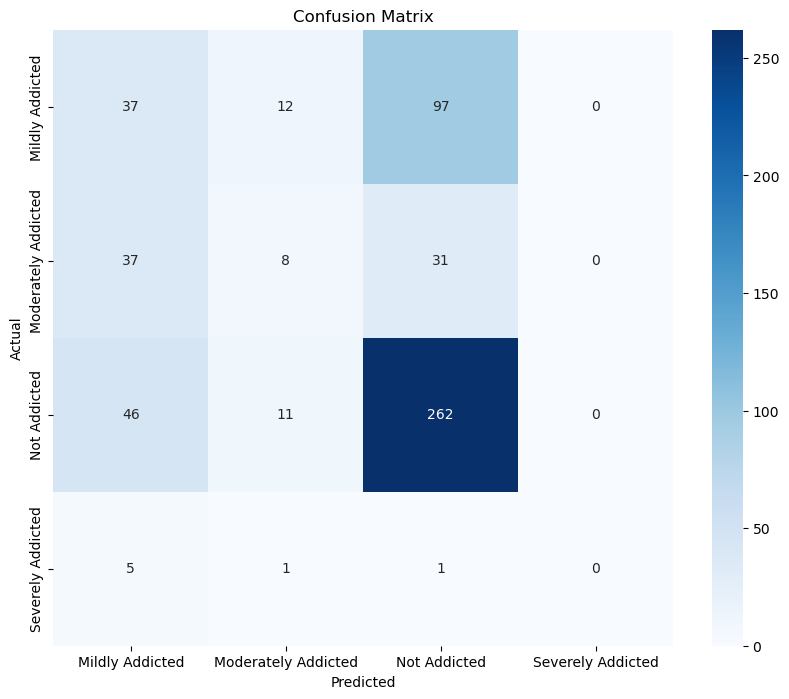

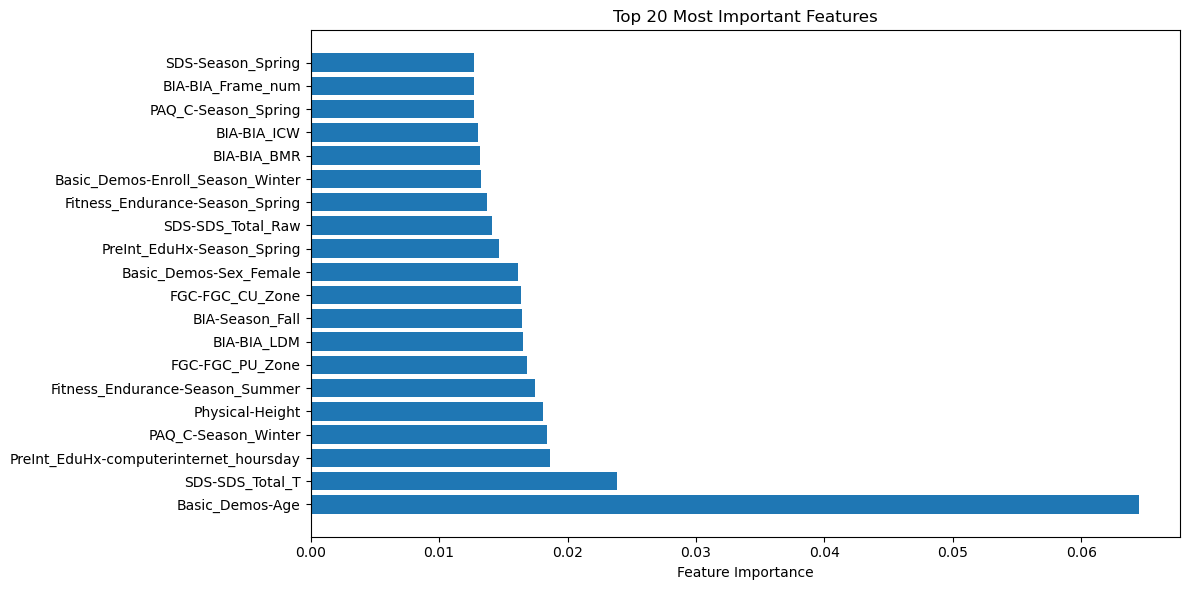


Top 10 Most Important Features:
                                   Feature  Importance
0                          Basic_Demos-Age    0.064452
43                         SDS-SDS_Total_T    0.023853
44  PreInt_EduHx-computerinternet_hoursday    0.018616
74                     PAQ_C-Season_Winter    0.018414
3                          Physical-Height    0.018085
61         Fitness_Endurance-Season_Summer    0.017463
18                         FGC-FGC_PU_Zone    0.016853
37                             BIA-BIA_LDM    0.016502
67                         BIA-Season_Fall    0.016485
12                         FGC-FGC_CU_Zone    0.016380


In [90]:
# Import required libraries
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y['sii'])

# Print encoded classes for verification
print("Classes:", label_encoder.classes_)
print("Encoded values:", np.unique(y_encoded))

# Split the data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    eval_metric=['merror', 'mlogloss'],
    random_state=42
)

# Train the model
xgb_model.fit(
    X_train_split, 
    y_train_split,
    eval_set=[(X_test_split, y_test_split)],
    verbose=True
)


# Make predictions
y_pred = xgb_model.predict(X_test_split)

# Print model performance
print("\nModel Accuracy:", accuracy_score(y_test_split, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_split, y_pred, 
                          target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_split, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Save feature importance to a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_split, y_train_split)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


In [96]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [108]:
print(X_train.columns)

Index(['Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num',
       'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
       'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
       'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday',
       'Basic_Demos-Enroll_Season_Fall', 

Validating input data...
X_train shape: (2736, 83)
X_train columns: ['Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'Basic_Demos-Enroll_Season_Fall', 'Basic_Demos-Enroll_Season_Spring', 

D:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features: ['Basic_Demos-Age', 'Physical-Height', 'Fitness_Endurance-Max_Stage', 'FGC-FGC_GSND_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Frame_num', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'Basic_Demos-Enroll_Season_Summer', 'Basic_Demos-Sex_Female', 'Basic_Demos-Sex_Male', 'CGAS-Season_Fall', 'CGAS-Season_Spring', 'Physical-Season_Spring', 'Fitness_Endurance-Season_Spring', 'Fitness_Endurance-Season_Summer', 'BIA-Season_Summer', 'BIA-Season_Winter', 'SDS-Season_Winter', 'avg_fitness_score', 'physical_composite']

Tuning hyperparameters...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-mlogloss:1.31193
[1]	validation_0-mlogloss:1.24802
[2]	validation_0-mlogloss:1.19030
[3]	validation_0-mlogloss:1.14009
[4]	validation_0-mlogloss:1.09673
[5]	validation_0-mlogloss:1.05689
[6]	validation_0-mlogloss:1.02226
[7]	validation_0-mlogloss:0.99076
[8]	validation_0-mlogloss:0.96055
[9]	validation_0-mlogloss:0.93519
[10]	valid

D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:00:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[34]	validation_0-mlogloss:0.62716
[35]	validation_0-mlogloss:0.62163
[36]	validation_0-mlogloss:0.61694
[37]	validation_0-mlogloss:0.61174
[38]	validation_0-mlogloss:0.60684
[39]	validation_0-mlogloss:0.60304
[40]	validation_0-mlogloss:0.59920
[41]	validation_0-mlogloss:0.59389
[42]	validation_0-mlogloss:0.59060
[43]	validation_0-mlogloss:0.58511
[44]	validation_0-mlogloss:0.58068
[45]	validation_0-mlogloss:0.57711
[46]	validation_0-mlogloss:0.57384
[47]	validation_0-mlogloss:0.57132
[48]	validation_0-mlogloss:0.56679
[49]	validation_0-mlogloss:0.56537
[50]	validation_0-mlogloss:0.56290
[51]	validation_0-mlogloss:0.55947
[52]	validation_0-mlogloss:0.55643
[53]	validation_0-mlogloss:0.55415
[54]	validation_0-mlogloss:0.55169
[55]	validation_0-mlogloss:0.55003
[56]	validation_0-mlogloss:0.54794
[57]	validation_0-mlogloss:0.54545
[58]	validation_0-mlogloss:0.54364
[59]	validation_0-mlogloss:0.54108
[60]	validation_0-mlogloss:0.53927
[61]	validation_0-mlogloss:0.53758
[62]	validation_0-ml

D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:00:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



Model Evaluation:
Accuracy: 0.572992700729927

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.29      0.33       146
           1       0.24      0.20      0.22        76
           2       0.71      0.80      0.75       319
           3       0.00      0.00      0.00         7

    accuracy                           0.57       548
   macro avg       0.33      0.32      0.32       548
weighted avg       0.55      0.57      0.56       548



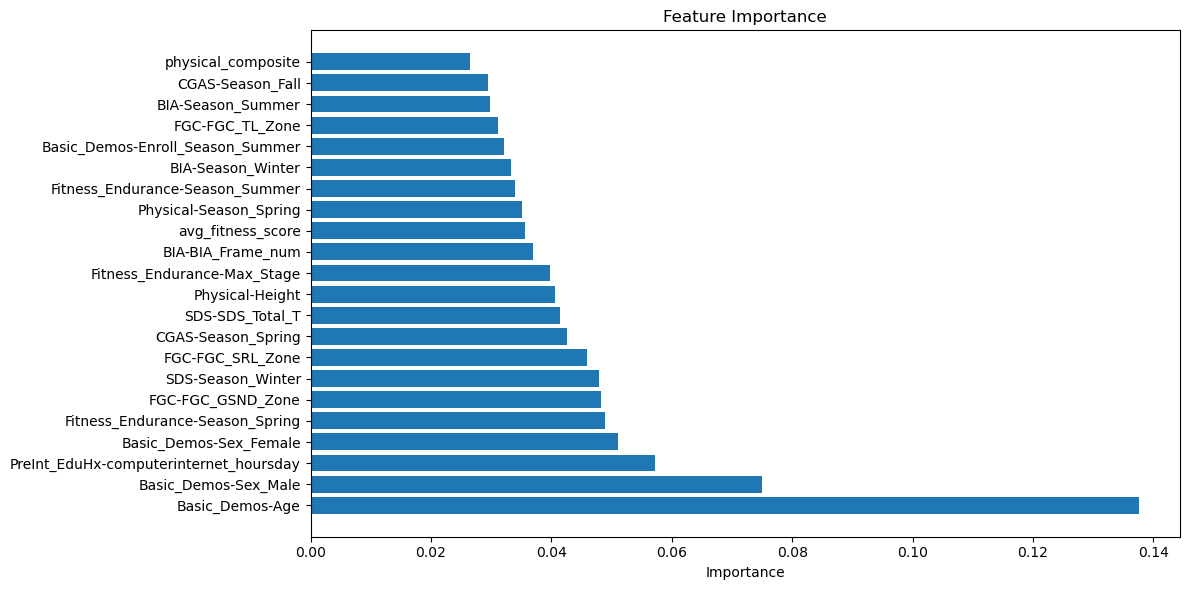


Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}

Selected Features: ['Basic_Demos-Age', 'Physical-Height', 'Fitness_Endurance-Max_Stage', 'FGC-FGC_GSND_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Frame_num', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'Basic_Demos-Enroll_Season_Summer', 'Basic_Demos-Sex_Female', 'Basic_Demos-Sex_Male', 'CGAS-Season_Fall', 'CGAS-Season_Spring', 'Physical-Season_Spring', 'Fitness_Endurance-Season_Spring', 'Fitness_Endurance-Season_Summer', 'BIA-Season_Summer', 'BIA-Season_Winter', 'SDS-Season_Winter', 'avg_fitness_score', 'physical_composite']


In [112]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

def engineer_features(df):
    """Create engineered features"""
    df = df.copy()
    print("\nFeatures available for engineering:", df.columns.tolist())
    
    # Check if required columns exist before creating features
    if 'Basic_Demos-Age' in df.columns and 'PreInt_EduHx-computerinternet_hoursday' in df.columns:
        df['age_internet'] = df['Basic_Demos-Age'] * df['PreInt_EduHx-computerinternet_hoursday']
        print("Created age_internet feature")
    
    # Aggregate fitness scores - using existing Zone columns
    zone_cols = [col for col in df.columns if 'Zone' in col]
    if zone_cols:
        df['avg_fitness_score'] = df[zone_cols].mean(axis=1)
        print(f"Created avg_fitness_score feature using {len(zone_cols)} zone columns")
    
    # Physical measurements aggregation
    physical_cols = ['Physical-BMI', 'Physical-Height', 'Physical-Weight', 
                    'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']
    available_physical_cols = [col for col in physical_cols if col in df.columns]
    if available_physical_cols:
        df['physical_composite'] = df[available_physical_cols].mean(axis=1)
        print(f"Created physical_composite feature using {len(available_physical_cols)} physical columns")
    
    # BIA measurements aggregation
    bia_numeric_cols = [col for col in df.columns if 'BIA' in col and 
                       col not in ['BIA-BIA_Activity_Level_num', 'BIA-BIA_Frame_num']]
    if bia_numeric_cols:
        df['bia_composite'] = df[bia_numeric_cols].mean(axis=1)
        print(f"Created bia_composite feature using {len(bia_numeric_cols)} BIA columns")
    
    print("\nFeatures after engineering:", df.columns.tolist())
    print(f"Total number of features: {len(df.columns)}")
    return df

def optimize_xgboost_model(X_train, y_train, X_test, y_test):
    """
    Optimized pipeline for XGBoost with reduced computation time
    """
    def handle_class_imbalance(X, y):
        """Apply SMOTE to handle class imbalance"""
        print("\nColumns before SMOTE:", X.columns.tolist())
        print("Shape before SMOTE:", X.shape)
        smote = SMOTE(random_state=42)
        X_balanced, y_balanced = smote.fit_resample(X, y)
        X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
        print("Shape after SMOTE:", X_balanced_df.shape)
        return X_balanced_df, y_balanced

    def select_features(X, y):
        """Feature selection using XGBoost importance"""
        print("\nColumns before feature selection:", X.columns.tolist())
        model = xgb.XGBClassifier(random_state=42)
        model.fit(X, y)
        
        selection = SelectFromModel(model, prefit=True)
        X_selected = selection.transform(X)
        selected_feat_idx = selection.get_support()
        selected_features = X.columns[selected_feat_idx].tolist()
        print("Selected features:", selected_features)
        return X_selected, selected_features

    def tune_hyperparameters(X, y):
        """Hyperparameter tuning using RandomizedSearchCV"""
        param_distributions = {
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200],
            'min_child_weight': [1, 3],
            'gamma': [0, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'scale_pos_weight': [1, 3]
        }
        
        # Create a base model with early_stopping_rounds
        model = xgb.XGBClassifier(
            objective='multi:softmax',
            random_state=42,
            callbacks=[xgb.callback.EarlyStopping(rounds=10)]
        )
        
        # Split data for eval_set
        X_tune, X_eval, y_tune, y_eval = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_distributions,
            n_iter=50,
            cv=5,
            scoring='balanced_accuracy',
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
        
        random_search.fit(
            X_tune, 
            y_tune,
            eval_set=[(X_eval, y_eval)]
        )
        
        return random_search.best_params_, random_search.best_score_

    # Check initial data
    print("\nInitial X_train info:")
    print("Shape:", X_train.shape)
    print("Missing values:", X_train.isnull().sum().sum())
    
    # 1. Feature Engineering
    print("\nStarting feature engineering...")
    X_train_engineered = engineer_features(X_train)
    X_test_engineered = engineer_features(X_test)

    # 2. Handle missing values if any
    if X_train_engineered.isnull().sum().sum() > 0:
        print("\nHandling missing values...")
        X_train_engineered = X_train_engineered.fillna(X_train_engineered.mean())
        X_test_engineered = X_test_engineered.fillna(X_train_engineered.mean())

    # 3. Handle Class Imbalance
    print("\nHandling class imbalance...")
    X_train_balanced, y_train_balanced = handle_class_imbalance(X_train_engineered, y_train)

    # 4. Feature Selection
    print("\nSelecting important features...")
    X_train_numpy, selected_features = select_features(X_train_balanced, y_train_balanced)
    
    # Convert numpy array back to DataFrame with correct features
    X_train_selected = pd.DataFrame(X_train_numpy, columns=selected_features)
    X_test_selected = X_test_engineered[selected_features]

    # 5. Hyperparameter Tuning
    print("\nTuning hyperparameters...")
    best_params, best_score = tune_hyperparameters(X_train_selected, y_train_balanced)
    
    # 6. Train Final Model
    print("\nTraining final model...")
    final_model = xgb.XGBClassifier(
        **best_params,
        random_state=42,
        callbacks=[xgb.callback.EarlyStopping(rounds=10)]
    )
    
    final_model.fit(
        X_train_selected, 
        y_train_balanced,
        eval_set=[(X_test_selected, y_test)],
        verbose=False
    )

    # 7. Make Predictions
    y_pred = final_model.predict(X_test_selected)

    # 8. Evaluate Model
    print("\nModel Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 9. Plot Feature Importance
    plt.figure(figsize=(12, 6))
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': final_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.barh(range(len(feature_importance)), feature_importance['importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['feature'])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    return final_model, selected_features, best_params

def main(X_train, y):
    # Data validation
    print("Validating input data...")
    print("X_train shape:", X_train.shape)
    print("X_train columns:", X_train.columns.tolist())
    print("Missing values in X_train:", X_train.isnull().sum().sum())
    
    # Prepare the data
    print("\nPreparing data...")
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y['sii'])

    # Split the data
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train, y_encoded, 
        test_size=0.2, 
        random_state=42, 
        stratify=y_encoded
    )

    # Run the optimization pipeline
    print("\nStarting optimization pipeline...")
    final_model, selected_features, best_params = optimize_xgboost_model(
        X_train_split, 
        y_train_split, 
        X_test_split, 
        y_test_split
    )

    # Print final results
    print("\nBest Parameters:", best_params)
    print("\nSelected Features:", selected_features)
    
    return final_model, selected_features, best_params

if __name__ == "__main__":
    # Assuming X_train and y are your input data
    final_model, selected_features, best_params = main(X_train, y)

In [116]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt

def engineer_features(df):
    """Enhanced feature engineering with safety checks"""
    df = df.copy()
    
    # Basic interactions (safe multiplication)
    df['age_internet'] = df['Basic_Demos-Age'] * df['PreInt_EduHx-computerinternet_hoursday']
    
    # Enhanced physical measurements with safety checks
    df['bmi_age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    
    # Safe division for height/weight ratio
    df['height_weight_ratio'] = np.where(
        df['Physical-Weight'] > 0,
        df['Physical-Height'] / df['Physical-Weight'],
        0
    )
    
    # Safe division for BP ratio
    df['bp_ratio'] = np.where(
        df['Physical-Diastolic_BP'] > 0,
        df['Physical-Systolic_BP'] / df['Physical-Diastolic_BP'],
        0
    )
    
    # Fitness scores
    zone_cols = [col for col in df.columns if 'Zone' in col]
    df['avg_fitness_score'] = df[zone_cols].mean(axis=1)
    
    # Enhanced BIA features with safety checks
    df['fat_muscle_ratio'] = np.where(
        df['BIA-BIA_SMM'] > 0,
        df['BIA-BIA_Fat'] / df['BIA-BIA_SMM'],
        0
    )
    
    df['water_weight_ratio'] = np.where(
        df['Physical-Weight'] > 0,
        df['BIA-BIA_TBW'] / df['Physical-Weight'],
        0
    )
    
    # Physical activity and sleep interaction
    if 'PAQ_C-PAQ_C_Total' in df.columns and 'SDS-SDS_Total_T' in df.columns:
        df['activity_sleep_interaction'] = df['PAQ_C-PAQ_C_Total'] * df['SDS-SDS_Total_T']
    
    # Replace infinite values with 0
    df = df.replace([np.inf, -np.inf], 0)
    
    # Clip extreme values to reasonable ranges
    for col in df.columns:
        if df[col].dtype in ['float64', 'float32', 'int64', 'int32']:
            q1 = df[col].quantile(0.01)
            q3 = df[col].quantile(0.99)
            df[col] = df[col].clip(q1, q3)
    
    return df

def optimize_xgboost_model(X_train, y_train, X_test, y_test):
    def handle_class_imbalance(X, y):
        """Enhanced class imbalance handling"""
        # Identify categorical columns (binary and season columns)
        categorical_features = [i for i, col in enumerate(X.columns) if 
                              ('Season' in col) or ('Sex' in col) or 
                              ('Zone' in col) or ('_num' in col)]
        
        smote_nc = SMOTENC(categorical_features=categorical_features, 
                          random_state=42,
                          sampling_strategy='auto',
                          k_neighbors=5)
        X_balanced, y_balanced = smote_nc.fit_resample(X, y)
        return pd.DataFrame(X_balanced, columns=X.columns), y_balanced

    def tune_hyperparameters(X, y):
        """Enhanced hyperparameter tuning"""
        param_grid = {
            'max_depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [200, 300],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [0.1, 1.0]
        }
        
        # Using StratifiedKFold for better handling of imbalanced classes
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        best_score = 0
        best_params = None
        
        # Manual grid search with cross-validation
        for depth in param_grid['max_depth']:
            for lr in param_grid['learning_rate']:
                for n_est in param_grid['n_estimators']:
                    for mcw in param_grid['min_child_weight']:
                        params = {
                            'max_depth': depth,
                            'learning_rate': lr,
                            'n_estimators': n_est,
                            'min_child_weight': mcw,
                            'objective': 'multi:softmax',
                            'num_class': len(np.unique(y)),
                            'tree_method': 'hist'  # For faster training
                        }
                        
                        scores = []
                        for train_idx, val_idx in skf.split(X, y):
                            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
                            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
                            
                            model = xgb.XGBClassifier(**params)
                            model.fit(X_train_fold, y_train_fold,
                                    eval_set=[(X_val_fold, y_val_fold)],
                                    verbose=0)
                            
                            y_pred = model.predict(X_val_fold)
                            scores.append(accuracy_score(y_val_fold, y_pred))
                        
                        avg_score = np.mean(scores)
                        if avg_score > best_score:
                            best_score = avg_score
                            best_params = params
        
        return best_params, best_score

    # 1. Feature Engineering
    print("Performing enhanced feature engineering...")
    X_train_engineered = engineer_features(X_train)
    X_test_engineered = engineer_features(X_test)

    # 2. Feature Selection
    print("Selecting important features...")
    model = xgb.XGBClassifier(random_state=42)
    model.fit(X_train_engineered, y_train)
    
    selection = SelectFromModel(model, prefit=True, threshold='median')
    X_train_selected = selection.transform(X_train_engineered)
    X_test_selected = selection.transform(X_test_engineered)
    
    selected_feat_idx = selection.get_support()
    selected_features = X_train_engineered.columns[selected_feat_idx].tolist()
    
    X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
    X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

    # 3. Handle Class Imbalance
    print("Handling class imbalance...")
    X_train_balanced, y_train_balanced = handle_class_imbalance(X_train_selected, y_train)

    # 4. Hyperparameter Tuning
    print("Tuning hyperparameters...")
    best_params, best_score = tune_hyperparameters(X_train_balanced, y_train_balanced)
    
    # 5. Train Final Model
    print("Training final model...")
    final_model = xgb.XGBClassifier(**best_params, random_state=42)
    
    final_model.fit(
        X_train_balanced, 
        y_train_balanced,
        eval_set=[(X_test_selected, y_test)],
        verbose=False
    )

    # Make predictions
    y_pred = final_model.predict(X_test_selected)

    # Print results
    print("\nModel Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return final_model, selected_features, best_params

# Main execution remains the same
if __name__ == "__main__":
    # Assuming X_train and y are your input data
    final_model, selected_features, best_params = main(X_train, y)

Validating input data...
X_train shape: (2736, 83)
X_train columns: ['Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'Basic_Demos-Enroll_Season_Fall', 'Basic_Demos-Enroll_Season_Spring', 

D:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Handling class imbalance...
Tuning hyperparameters...
Training final model...

Model Evaluation:
Accuracy: 0.5638686131386861

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.32      0.33       146
           1       0.26      0.17      0.21        76
           2       0.70      0.78      0.74       319
           3       0.00      0.00      0.00         7

    accuracy                           0.56       548
   macro avg       0.33      0.32      0.32       548
weighted avg       0.53      0.56      0.55       548


Best Parameters: {'max_depth': 8, 'learning_rate': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'objective': 'multi:softmax', 'num_class': 4, 'tree_method': 'hist'}

Selected Features: ['Basic_Demos-Age', 'Physical-Height', 'Physical-Weight', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD_Zone', '

In [118]:
pip install lightgbm catboost

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 2.8 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 5.5 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 6.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.4/101.7 MB 11.6 MB/s eta 0:00:09
   ---------------------------------------- 0.8/101.7 MB 9.7 MB/s eta 0:00:11
   ---------------------------------------- 1.1/101.7 MB 8.9 MB/s eta 0:00:12
    --------------------------------------- 1.5/101.7 MB 9.6 MB/s eta 0:00:11
    --------------------------------------- 2.0/101.7 MB 9.6 MB/s eta 0:00:11
    --------------------------------------- 2.5/101.7 MB 10.6 MB/s eta 0:00:10
   - -----

In [120]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC

def engineer_features(df):
    """Feature engineering with safety checks"""
    df = df.copy()
    
    # Basic interactions
    df['age_internet'] = df['Basic_Demos-Age'] * df['PreInt_EduHx-computerinternet_hoursday']
    
    # Enhanced physical measurements with safety checks
    df['bmi_age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    
    # Safe division for ratios
    df['height_weight_ratio'] = np.where(
        df['Physical-Weight'] > 0,
        df['Physical-Height'] / df['Physical-Weight'],
        0
    )
    
    df['bp_ratio'] = np.where(
        df['Physical-Diastolic_BP'] > 0,
        df['Physical-Systolic_BP'] / df['Physical-Diastolic_BP'],
        0
    )
    
    # Fitness scores
    zone_cols = [col for col in df.columns if 'Zone' in col]
    df['avg_fitness_score'] = df[zone_cols].mean(axis=1)
    
    # BIA features
    df['fat_muscle_ratio'] = np.where(
        df['BIA-BIA_SMM'] > 0,
        df['BIA-BIA_Fat'] / df['BIA-BIA_SMM'],
        0
    )
    
    # Replace infinite values and handle extremes
    df = df.replace([np.inf, -np.inf], 0)
    
    for col in df.columns:
        if df[col].dtype in ['float64', 'float32', 'int64', 'int32']:
            q1 = df[col].quantile(0.01)
            q3 = df[col].quantile(0.99)
            df[col] = df[col].clip(q1, q3)
    
    return df

def create_ensemble_model():
    """Create an ensemble model using stacking"""
    
    # Base models
    xgb_model = xgb.XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        tree_method='hist'
    )
    
    lgb_model = lgb.LGBMClassifier(
        n_estimators=200,
        learning_rate=0.1,
        num_leaves=31,
        random_state=42
    )
    
    catboost_model = CatBoostClassifier(
        iterations=200,
        learning_rate=0.1,
        depth=6,
        random_state=42,
        verbose=False
    )
    
    # Define the stacking classifier
    estimators = [
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('catboost', catboost_model)
    ]
    
    # Use logistic regression as the final estimator
    stack = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(max_iter=1000),
        cv=5,
        n_jobs=-1
    )
    
    return stack

def train_ensemble_model(X_train, y_train, X_test, y_test):
    """Train and evaluate the ensemble model"""
    
    # 1. Feature Engineering
    print("Performing feature engineering...")
    X_train_engineered = engineer_features(X_train)
    X_test_engineered = engineer_features(X_test)
    
    # 2. Handle Class Imbalance
    print("Handling class imbalance...")
    categorical_features = [i for i, col in enumerate(X_train_engineered.columns) if 
                          ('Season' in col) or ('Sex' in col) or 
                          ('Zone' in col) or ('_num' in col)]
    
    smote_nc = SMOTENC(
        categorical_features=categorical_features,
        random_state=42,
        sampling_strategy='auto',
        k_neighbors=5
    )
    
    X_train_balanced, y_train_balanced = smote_nc.fit_resample(X_train_engineered, y_train)
    X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train_engineered.columns)
    
    # 3. Create and Train Ensemble Model
    print("Training ensemble model...")
    ensemble = create_ensemble_model()
    ensemble.fit(X_train_balanced, y_train_balanced)
    
    # 4. Make Predictions
    y_pred = ensemble.predict(X_test_engineered)
    
    # 5. Evaluate Model
    print("\nModel Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return ensemble

def main(X_train, y):
    # Prepare the data
    print("Preparing data...")
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y['sii'])
    
    # Split the data
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train, y_encoded, 
        test_size=0.2, 
        random_state=42, 
        stratify=y_encoded
    )
    
    # Train and evaluate the model
    print("Starting ensemble training...")
    final_model = train_ensemble_model(
        X_train_split, 
        y_train_split, 
        X_test_split, 
        y_test_split
    )
    
    return final_model

if __name__ == "__main__":
    # Assuming X_train and y are your input data
    final_model = main(X_train, y)

Preparing data...
Starting ensemble training...
Performing feature engineering...
Handling class imbalance...
Training ensemble model...

Model Evaluation:
Accuracy: 0.5492700729927007

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.34      0.33       146
           1       0.18      0.11      0.13        76
           2       0.70      0.76      0.73       319
           3       0.00      0.00      0.00         7

    accuracy                           0.55       548
   macro avg       0.30      0.30      0.30       548
weighted avg       0.52      0.55      0.53       548



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [122]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

def engineer_features(df):
    """Enhanced feature engineering"""
    df = df.copy()
    
    # Core features
    df['age_internet'] = df['Basic_Demos-Age'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['bmi_age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    
    # Physical composites
    physical_cols = ['Physical-BMI', 'Physical-Height', 'Physical-Weight', 
                    'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']
    df['physical_composite'] = df[physical_cols].mean(axis=1)
    
    # Fitness metrics
    zone_cols = [col for col in df.columns if 'Zone' in col]
    df['avg_fitness_score'] = df[zone_cols].mean(axis=1)
    
    # BIA composites
    bia_cols = [col for col in df.columns if 'BIA' in col and '_num' not in col]
    df['bia_composite'] = df[bia_cols].mean(axis=1)
    
    # Advanced ratios (with safety checks)
    df['height_weight_ratio'] = np.where(df['Physical-Weight'] > 0,
                                       df['Physical-Height'] / df['Physical-Weight'], 0)
    df['bp_ratio'] = np.where(df['Physical-Diastolic_BP'] > 0,
                             df['Physical-Systolic_BP'] / df['Physical-Diastolic_BP'], 0)
    
    # Cleanup
    df = df.replace([np.inf, -np.inf], 0)
    
    # Normalize numerical columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

def get_optimized_models():
    """Create optimized base models"""
    
    # XGBoost
    xgb_params = {
        'n_estimators': 300,
        'learning_rate': 0.05,
        'max_depth': 6,
        'min_child_weight': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'tree_method': 'hist',
        'random_state': 42
    }
    xgb_model = xgb.XGBClassifier(**xgb_params)
    
    # LightGBM
    lgb_params = {
        'n_estimators': 300,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'random_state': 42
    }
    lgb_model = lgb.LGBMClassifier(**lgb_params)
    
    # CatBoost
    catboost_params = {
        'iterations': 300,
        'learning_rate': 0.05,
        'depth': 6,
        'l2_leaf_reg': 3,
        'random_state': 42,
        'verbose': False
    }
    catboost_model = CatBoostClassifier(**catboost_params)
    
    # Random Forest
    rf_params = {
        'n_estimators': 300,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'random_state': 42,
        'class_weight': 'balanced'
    }
    rf_model = RandomForestClassifier(**rf_params)
    
    # Gradient Boosting
    gb_params = {
        'n_estimators': 300,
        'learning_rate': 0.05,
        'max_depth': 6,
        'min_samples_split': 5,
        'random_state': 42
    }
    gb_model = GradientBoostingClassifier(**gb_params)
    
    return [
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('catboost', catboost_model),
        ('rf', rf_model),
        ('gb', gb_model)
    ]

def create_advanced_ensemble():
    """Create an advanced stacking ensemble"""
    
    # Get base models
    estimators = get_optimized_models()
    
    # Create meta-learner with optimal parameters
    meta_learner = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=2000,
        class_weight='balanced',
        random_state=42
    )
    
    # Create stacking classifier
    stack = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_learner,
        cv=5,
        n_jobs=-1,
        passthrough=True  # Include original features
    )
    
    return stack

def train_advanced_ensemble(X_train, y_train, X_test, y_test):
    """Train and evaluate the advanced ensemble"""
    
    # 1. Feature Engineering
    print("Performing enhanced feature engineering...")
    X_train_engineered = engineer_features(X_train)
    X_test_engineered = engineer_features(X_test)
    
    # 2. Handle Class Imbalance
    print("Handling class imbalance...")
    categorical_features = [i for i, col in enumerate(X_train_engineered.columns) if 
                          ('Season' in col) or ('Sex' in col) or 
                          ('Zone' in col) or ('_num' in col)]
    
    smote_nc = SMOTENC(
        categorical_features=categorical_features,
        random_state=42,
        sampling_strategy='auto',
        k_neighbors=5
    )
    
    X_train_balanced, y_train_balanced = smote_nc.fit_resample(X_train_engineered, y_train)
    X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train_engineered.columns)
    
    # 3. Create and Train Ensemble
    print("Training advanced ensemble...")
    ensemble = create_advanced_ensemble()
    ensemble.fit(X_train_balanced, y_train_balanced)
    
    # 4. Predictions and Evaluation
    y_pred = ensemble.predict(X_test_engineered)
    
    print("\nModel Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return ensemble

def main(X_train, y):
    print("Preparing data...")
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y['sii'])
    
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train, y_encoded, 
        test_size=0.2, 
        random_state=42, 
        stratify=y_encoded
    )
    
    print("Starting advanced ensemble training...")
    final_model = train_advanced_ensemble(
        X_train_split, 
        y_train_split, 
        X_test_split, 
        y_test_split
    )
    
    return final_model

if __name__ == "__main__":
    final_model = main(X_train, y)

Preparing data...
Starting advanced ensemble training...
Performing enhanced feature engineering...
Handling class imbalance...
Training advanced ensemble...
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8

Model Evaluation:
Accuracy: 0.4543795620437956

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.43      0.34       146
           1       0.25      0.21      0.23        76
           2       0.66      0.53      0.59       319
           3       1.00      0.14      0.25         7

    accuracy                           0.45       548
   macro avg       0.55      0.33      0.35       548
weighted avg       0.50      0.45      0.47       548

